In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("../../data/raw/crime.csv", encoding = 'unicode_escape')
# Loading in the data set.

In [4]:
print("Number of rows and columns respectively:", df1.shape)
print("Columns in the dataset:", df1.columns)

# A brief descripton of the number of entries and categories for our raw data.

Number of rows and columns respectively: (319073, 17)
Columns in the dataset: Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')


In [5]:
dfClean = df1.drop(columns = ['INCIDENT_NUMBER', 'REPORTING_AREA', 'DAY_OF_WEEK', 'UCR_PART', 'Location', 'OFFENSE_DESCRIPTION', 'Lat', 'Long', 'HOUR', 'OCCURRED_ON_DATE', 'OFFENSE_CODE'])
dfClean['SHOOTING'] = dfClean['SHOOTING'].fillna('N')
dfClean.dropna()

,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
0,Larceny,D14,N,2018,9,LINCOLN ST
1,Vandalism,C11,N,2018,8,HECLA ST
2,Towed,D4,N,2018,9,CAZENOVE ST
3,Investigate Property,D4,N,2018,9,NEWCOMB ST
4,Investigate Property,B3,N,2018,9,DELHI ST
...,...,...,...,...,...,...
319068,Warrant Arrests,D4,N,2016,6,COVENTRY ST
319069,Homicide,E18,N,2015,7,RIVER ST
319070,Warrant Arrests,E18,N,2015,7,RIVER ST
319071,Warrant Arrests,E13,N,2016,5,NEW WASHINGTON ST


In [6]:
dfClean.describe(include = 'object').T
# Describes characteristics of my processed data.
# OFFENSE_CODE_GROUP: Shows the code which the crime committed falls under, out of 67 total unique options.
# DISTRICT: Shows which district out of the 12 in Boston where the crime was committed.
#SHOOTING: Informs the reader if the crime involved a shooting, Y meaning one occured and N meaning one had not.
#STREET: Shows the street name on which the crime was committed.

,count,unique,top,freq
OFFENSE_CODE_GROUP,319073,67,Motor Vehicle Accident Response,37132
DISTRICT,317308,12,B2,49945
SHOOTING,319073,2,N,318054
STREET,308202,4657,WASHINGTON ST,14194


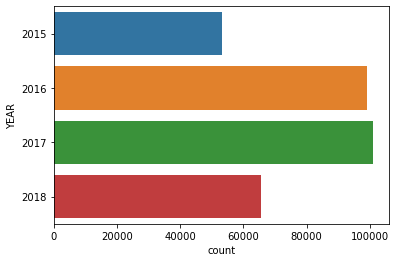

In [7]:
countVsYear = sns.countplot(y ='YEAR' ,data = dfClean)
# The data reflects the number of crimes committed total by year. 
# The 2015 and 2018 statistics are flawed as the BPD only begun using this system during June of 2015, and abandoned
# the system during September of 2018.
# However, after calculating, the rankng of crime by year in Boston is:
# 1) 2015 with 104 054 predicted reported crimes 
# 2) 2017 with 97 961 reported crimes
# 3) 2016 with 93 173 reported crimes
# 4) 2018 with 85 764 predicted reported crimes
# This gives us an early indication that the BPD are effective in reducing crimes as the criminal activity in Boston 
# seems to have a downward trend year-by-year.

In [8]:
dfClean2015 = dfClean[dfClean['YEAR'] == 2015]
numCrime2015 = dfClean2015.dropna().shape[0]
print('The number of crimes committed in Boston in 2015 is', numCrime2015)
dfClean2015.dropna()
#Creates a new data set for the criminal activity in Boston for the year 2015.

The number of crimes committed in Boston in 2015 is 52027


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
4363,Harassment,B3,N,2015,7,RADCLIFFE ST
14715,Other,B2,N,2015,7,FAYSTON ST
16645,Fraud,D4,N,2015,12,WESTLAND AVE
16646,Larceny,D4,N,2015,12,WESTLAND AVE
24888,Fraud,E18,N,2015,7,OAKCREST RD
...,...,...,...,...,...,...
319064,Drug Violation,A1,N,2015,8,BOYLSTON ST
319065,Drug Violation,A1,N,2015,8,BOYLSTON ST
319069,Homicide,E18,N,2015,7,RIVER ST
319070,Warrant Arrests,E18,N,2015,7,RIVER ST


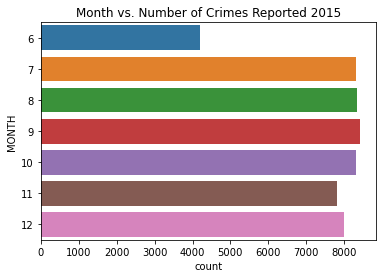

In [37]:
countVsMonth2015 = sns.countplot(y ='MONTH' ,data = dfClean2015).set(title = 'Month vs. Number of Crimes Reported 2015')
# Note: BPD began using this new system in June.
# Crime by month in 2015, which indicates an slight decrease in criminal activity heading into 2016, with the peak
# occuring in September which is then followed by a downward trend.

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT 2015')

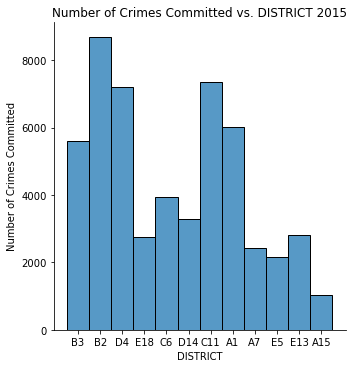

In [10]:
sns.displot(dfClean2015['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT 2015')
# This data shows the criminal hot spots for Boston in 2015, which has the distrcits B2, C11, and D4 reining as the top 3.

In [11]:
dfClean2016 = dfClean[dfClean['YEAR'] == 2016]
numCrime2016 = dfClean2016.dropna().shape[0]
print('The number of crimes committed in Boston in 2016 is', numCrime2016)
dfClean2016.dropna()
#Creates a new data set for the criminal activity in Boston for the year 2016.

The number of crimes committed in Boston in 2016 is 93173


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
1813,Fraud,C11,N,2016,1,HILL TOP ST
3072,Property Lost,E13,N,2016,7,HATHAWAY ST
7885,Harassment,D4,N,2016,8,W NEWTON ST
11783,Counterfeiting,E5,N,2016,9,GARNET RD
12825,Police Service Incidents,B3,N,2016,10,WARNER ST
...,...,...,...,...,...,...
319058,Violations,B2,N,2016,7,SLAYTON WAY
319059,Warrant Arrests,C11,N,2016,2,GENEVA AVE
319060,Warrant Arrests,C11,N,2016,2,GENEVA AVE
319068,Warrant Arrests,D4,N,2016,6,COVENTRY ST


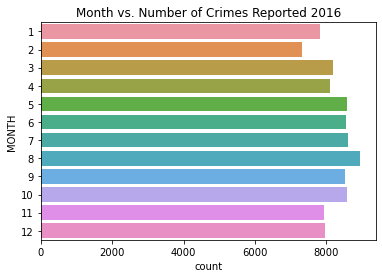

In [36]:
countVsMonth2016 = sns.countplot(y ='MONTH' ,data = dfClean2016).set(title = 'Month vs. Number of Crimes Reported 2016')
# This month by month chart for criminal activity in Boston shows the downward trend continued from the end of 2015
# for the first couple of months. However, crime rates quickly increase come May as it is followed by 6 straight months of
# at least 8000 reported crimes each month.

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT 2016')

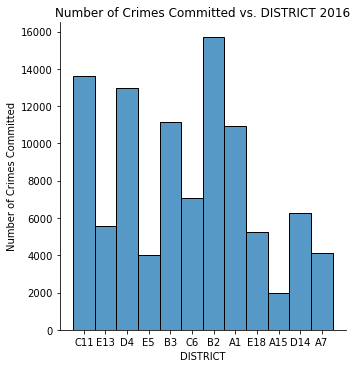

In [13]:
sns.displot(dfClean2016['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT 2016')
# This data shows the criminal hot spots for Boston in 2016, which has the distrcits B2, C11, and D4 reining as
# again the top 3. It's also of note there isn't much movement in the ranking of the districts.

In [14]:
dfClean2017 = dfClean[dfClean['YEAR'] == 2017]
numCrime2017 = dfClean2017.dropna().shape[0]
print('The number of crimes committed in Boston in 2017 is', numCrime2017)
dfClean2017.dropna()
#Creates a new data set for the criminal activity in Boston for the year 2017.

The number of crimes committed in Boston in 2017 is 97961


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
569,Fraud,D4,N,2017,11,E BROOKLINE ST
744,Investigate Property,D14,N,2017,10,KELTON ST
923,Property Lost,B2,N,2017,8,SHAWMUT AVE
1162,Fraud,D14,N,2017,6,COMMONWEALTH AVE
1444,Property Lost,B3,N,2017,12,MORTON ST
...,...,...,...,...,...,...
318915,Violations,E18,N,2017,1,AMERICAN LEGION HWY
318927,Warrant Arrests,D14,N,2017,4,BRIGHTON AVE
319030,Warrant Arrests,B2,N,2017,1,JOHN ELIOT SQ
319031,Drug Violation,B2,N,2017,1,JOHN ELIOT SQ


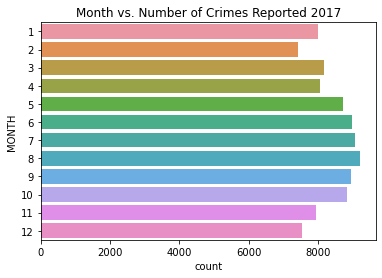

In [38]:
countVsMonth2017 = sns.countplot(y ='MONTH' ,data = dfClean2017).set(title = 'Month vs. Number of Crimes Reported 2017')
# Number of crimes per month for the year 2017. 2017 continued a similar trend to 2016, as it also had 6 straight months 
# of over 8000 reported crimes. This contradicts our initial observation as crime rates have remained relatively steady.

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT 2017')

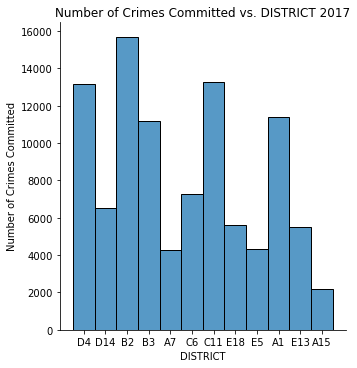

In [16]:
sns.displot(dfClean2017['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT 2017')
# For 2017, this bar graph still has B2, C11, and D4 and again doesn't show much movement.

In [17]:
dfClean2018 = dfClean[dfClean['YEAR'] == 2018]
numCrime2018 = dfClean2018.dropna().shape[0]
print('The number of crimes committed in Boston in 2018 is', numCrime2018)
dfClean2018.dropna()
#Creates a new data set for the criminal activity in Boston for the year 2018.

The number of crimes committed in Boston in 2018 is 64323


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
0,Larceny,D14,N,2018,9,LINCOLN ST
1,Vandalism,C11,N,2018,8,HECLA ST
2,Towed,D4,N,2018,9,CAZENOVE ST
3,Investigate Property,D4,N,2018,9,NEWCOMB ST
4,Investigate Property,B3,N,2018,9,DELHI ST
...,...,...,...,...,...,...
318904,Warrant Arrests,E13,N,2018,7,HUBBARD ST
318905,Drug Violation,E13,N,2018,7,HUBBARD ST
319042,Warrant Arrests,A1,N,2018,8,CAMBRIDGE ST
319066,Drug Violation,E13,N,2018,1,CENTRE ST


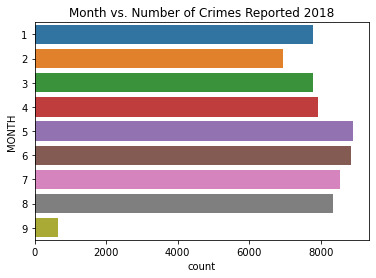

In [39]:
countVsMonth2018 = sns.countplot(y ='MONTH' ,data = dfClean2018).set(title = 'Month vs. Number of Crimes Reported 2018')
# Note: the BPD stopped using this system during September of 2018. 
# 2018 continues the previous trends established in the earlier years, with peaks in criminal activity around halfway
# through the year. 

Text(0.5, 1.0, 'Number of Crimes Committed vs. DISTRICT 2018')

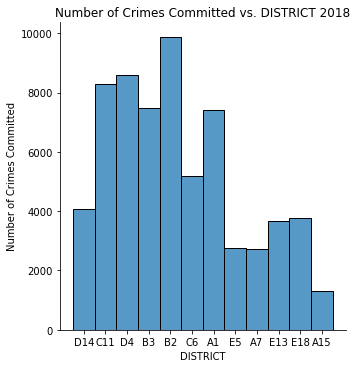

In [19]:
sns.displot(dfClean2018['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Crimes Committed')
plt.title('Number of Crimes Committed vs. DISTRICT 2018')
# 2018 also continues the trends set in previous years as there isn't much movement between the district rankings in 
# terms of overall crimes reported. Another further indication that the BPD are ineffictive in reducing crime. Some
# districts have had substantial drops however this can be accounted for as the system only accounted for 9 out of the
# 12 motnhs of the year.

In [20]:
dfShoot2015 = dfClean2015[dfClean2015['SHOOTING'] == 'Y']
numShoot2015 = dfShoot2015.shape[0]
print('The number of confirmed shootings committed in Boston in 2015 is', numShoot2015)
dfShoot2015
# Creates a data set focused only on the reported crimes which involved a shooting in the year 2015.
# This is done to gain an insight into how effective the BPD are in reducing more dangerous crimes in Boston.

The number of confirmed shootings committed in Boston in 2015 is 185


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
266275,Aggravated Assault,A7,Y,2015,12,DECATUR ST
266280,Aggravated Assault,B3,Y,2015,12,GLEASON ST
266665,Homicide,B3,Y,2015,12,WILMORE ST
266666,Aggravated Assault,B3,Y,2015,12,WILMORE ST
266667,Firearm Violations,B3,Y,2015,12,WILMORE ST
...,...,...,...,...,...,...
317369,Aggravated Assault,B2,Y,2015,6,DUDLEY ST
317370,Firearm Violations,B2,Y,2015,6,DUDLEY ST
317371,Warrant Arrests,B2,Y,2015,6,DUDLEY ST
317567,Aggravated Assault,B2,Y,2015,6,KERR WAY


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT 2015')

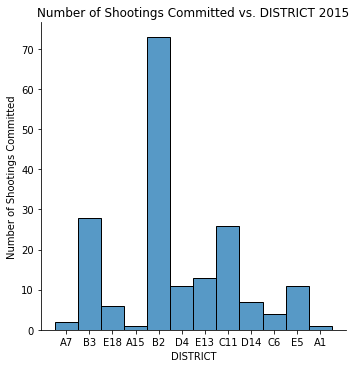

In [21]:
sns.displot(dfShoot2015['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT 2015')
# For the year 2015, the bar graph follows a similar trend as the overall crimes commited bar plots with B2 and C11
# clearly having some of the highest rates again. However, we see strong drop in activity at the D4 district, which
# implies the crime in D4 may be less dangerous compared to other districts with higher crime rates.

In [22]:
dfShoot2016 = dfClean2016[dfClean2016['SHOOTING'] == 'Y']
numShoot2016 = dfShoot2016.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2016 is', numShoot2016)
dfShoot2016
# Creates a data set focused only on the reported crimes which involved a shooting in the year 2016.

The number of confirmed shootings committed in Boston in 2016 is 277


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
167458,Aggravated Assault,C11,Y,2016,12,BOWDOIN ST
167912,Aggravated Assault,C11,Y,2016,12,DRAPER ST
168987,Aggravated Assault,B3,Y,2016,12,GLEASON ST
169272,Aggravated Assault,B3,Y,2016,12,COLONIAL AVE
170542,Aggravated Assault,B3,Y,2016,12,CALLENDER ST
...,...,...,...,...,...,...
263760,Aggravated Assault,B3,Y,2016,1,BLUE HILL AVE
264131,Aggravated Assault,C11,Y,2016,5,MOUNT BOWDOIN TER
265935,Search Warrants,B3,Y,2016,1,BLUE HILL AVE
265936,Aggravated Assault,B3,Y,2016,1,BLUE HILL AVE


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT 2016')

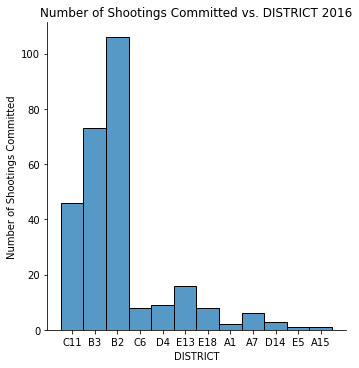

In [23]:
sns.displot(dfShoot2016['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT 2016')
# 2016 shooting statistics remain fairly unchanged from 2015. However, districts such as B3 and C11 have had drastic
# increases in the amounts of shootings. Usually this can be attributed to the full year of data from 2016 compared to
# only having 6 months in 2015, however, other districts have similar numbers compared to the previous year. Which can 
# be interpretted as the BPD reducing the amount of shootings in less crime heavy areas or the BPD failing at limiting
# gun-related crimes in areas with large amounts of criminal activity.

In [24]:
dfShoot2017 = dfClean2017[dfClean2017['SHOOTING'] == 'Y']
numShoot2017 = dfShoot2017.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2017 is', numShoot2017)
dfShoot2017
# Creates a data set focused only on the reported crimes which involved a shooting in the year 2017.

The number of confirmed shootings committed in Boston in 2017 is 361


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
66499,Aggravated Assault,B2,Y,2017,12,ELDER ST
66880,Aggravated Assault,E18,Y,2017,12,FLORIAN ST
67672,Aggravated Assault,C11,Y,2017,12,BELFORT ST
67699,Vandalism,B3,Y,2017,12,WELLINGTON HILL ST
67700,Homicide,B3,Y,2017,12,WELLINGTON HILL ST
...,...,...,...,...,...,...
167108,Aggravated Assault,B3,Y,2017,1,BROWNING AVE
197877,Aggravated Assault,B2,Y,2017,2,WASHINGTON ST
197878,Aggravated Assault,B2,Y,2017,2,WASHINGTON ST
197879,Firearm Violations,B2,Y,2017,2,WASHINGTON ST


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT 2017')

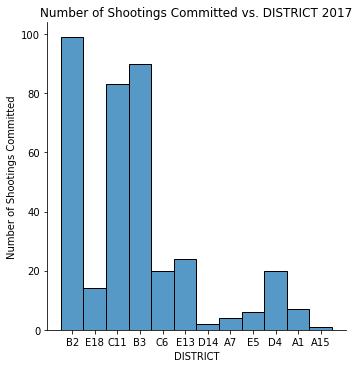

In [25]:
sns.displot(dfShoot2017['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT 2017')
# 2017 sees an overall increase in the number of shootings compared to 2016, especially in districts with less criminal
# activity. 

In [26]:
dfShoot2018 = dfClean2018[dfClean2018['SHOOTING'] == 'Y']
numShoot2018 = dfShoot2018.dropna().shape[0]
print('The number of confirmed shootings committed in Boston in 2018 is', numShoot2018)
dfShoot2018
# Creates a data set focused only on the reported crimes which involved a shooting in the year 2018.

The number of confirmed shootings committed in Boston in 2018 is 177


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,STREET
1295,Aggravated Assault,E18,Y,2018,8,HILLIS RD
1860,Aggravated Assault,B2,Y,2018,8,DUDLEY ST
3259,Homicide,B2,Y,2018,8,HOLLANDER ST
3260,Ballistics,B2,Y,2018,8,HOLLANDER ST
4107,Aggravated Assault,A15,Y,2018,8,MCNULTY CT
...,...,...,...,...,...,...
66085,Other,C6,Y,2018,1,B ST
66086,Aggravated Assault,C6,Y,2018,1,B ST
66087,HOME INVASION,C6,Y,2018,1,B ST
66088,Ballistics,C6,Y,2018,1,B ST


Text(0.5, 1.0, 'Number of Shootings Committed vs. DISTRICT 2018')

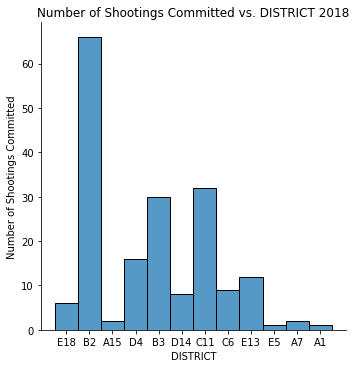

In [35]:
sns.displot(dfShoot2018['DISTRICT'], kde=False, bins=25)
plt.ylabel('Number of Shootings Committed')
plt.title('Number of Shootings Committed vs. DISTRICT 2018')
# Contradicting the previous year, 2018 sees a dramatic drop in overall gun-related crimes. However, this can again be 
# attributed to the BPD abandoning the system in September as each district contains a noticable decrease.

In [11]:
dfClean.to_csv(path_or_buf = '/Users/reecebatt/DATA301/project-group42-project/data/processed/Reece_df.csv')